In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Lambda, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.applications import VGG16, MobileNet, InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

In [2]:
# Load and preprocess the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [3]:
# Define the data augmentation generator
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

In [4]:
# Define the early stopping callback with increased patience
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [5]:
# CNN Architecture 1
model_cnn1 = Sequential([
    Conv2D(32, (5, 5), activation='relu', padding='same', input_shape=(32, 32, 3)),
    BatchNormalization(),
    Conv2D(32, (5, 5), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(512, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(1024, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [6]:
# CNN Architecture 2
model_cnn2 = Sequential([
    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(512, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [7]:
# CNN Architecture 3
model_cnn3 = Sequential([
    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(256, (3, 3), activation='relu', padding='same'),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),

    Conv2D(256, (1, 1), activation='relu'),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    Conv2D(512, (1, 1), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(512, (1, 1), activation='relu'),
    Conv2D(1024, (3, 3), activation='relu', padding='same'),
    Conv2D(1024, (1, 1), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(2048, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1024, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [8]:
# Transfer Learning - VGG16
base_model_vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
for layer in base_model_vgg16.layers:
    layer.trainable = False
model_vgg16 = Sequential([
    base_model_vgg16,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [9]:
# Transfer Learning - MobileNet
input_shape_mobilenet = (224, 224, 3)
base_model_mobilenet = MobileNet(weights='imagenet', include_top=False, input_shape=input_shape_mobilenet)
for layer in base_model_mobilenet.layers:
    layer.trainable = False
model_mobilenet = Sequential([
    Lambda(lambda x: tf.image.resize(x, input_shape_mobilenet[:2])),
    base_model_mobilenet,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [10]:
# Transfer Learning - InceptionV3
input_shape = (75, 75, 3)
base_model_inceptionv3 = InceptionV3(weights='imagenet', include_top=False, input_shape=input_shape)
for layer in base_model_inceptionv3.layers:
    layer.trainable = False
model_inceptionv3 = Sequential([
    Lambda(lambda x: tf.image.resize(x, input_shape[:2])),
    base_model_inceptionv3,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [11]:
# Compile the models with a lower learning rate
models = [model_cnn1, model_cnn2, model_cnn3, model_vgg16, model_mobilenet, model_inceptionv3]
model_names = ['CNN1', 'CNN2', 'CNN3', 'VGG16', 'MobileNet', 'InceptionV3']

In [12]:
for model in models:
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [13]:
# Initialize lists to store accuracy and loss values
accuracies = []
losses = []

In [14]:
# Define the class names
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

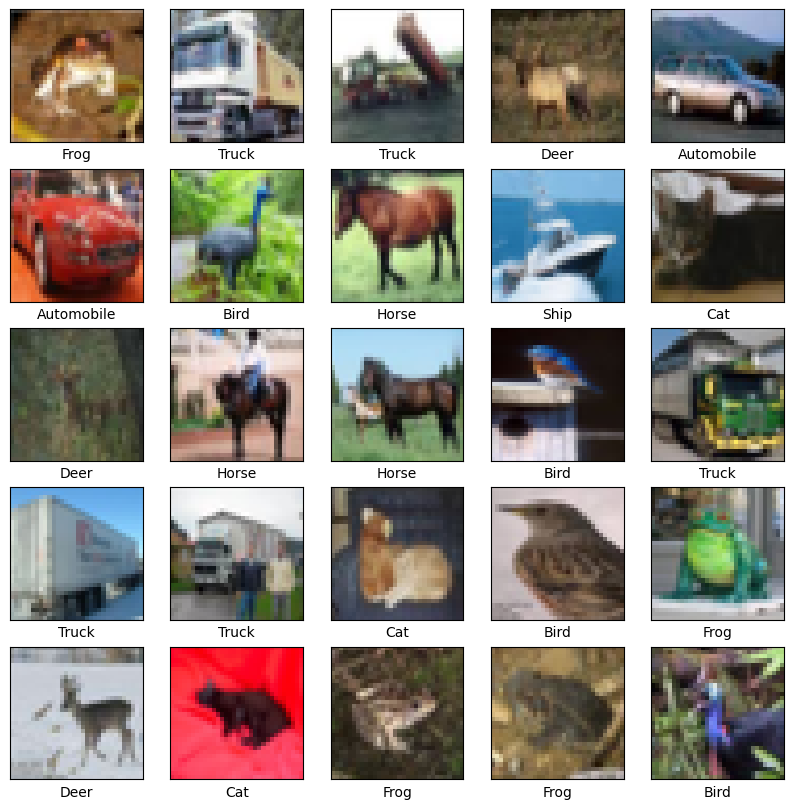

In [15]:
# Plot sample images from the dataset
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[np.argmax(y_train[i])])
plt.show()

In [16]:
# Print dataset information
print("\nDataset Information:\n")
print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Testing data shape:", x_test.shape)
print("Testing labels shape:", y_test.shape)
print("Number of classes:", len(class_names))
print("Class names:", class_names)


Dataset Information:

Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 10)
Testing data shape: (10000, 32, 32, 3)
Testing labels shape: (10000, 10)
Number of classes: 10
Class names: ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']



Training CNN1 Model...

Epoch 1/30
391/391 [==============================] - 44s 81ms/step - loss: 2.0511 - accuracy: 0.3195 - val_loss: 3.9140 - val_accuracy: 0.2253
Epoch 2/30
391/391 [==============================] - 30s 76ms/step - loss: 1.4789 - accuracy: 0.4711 - val_loss: 1.6320 - val_accuracy: 0.4262
Epoch 3/30
391/391 [==============================] - 29s 75ms/step - loss: 1.2666 - accuracy: 0.5515 - val_loss: 1.3692 - val_accuracy: 0.5487
Epoch 4/30
391/391 [==============================] - 30s 76ms/step - loss: 1.1122 - accuracy: 0.6092 - val_loss: 1.1518 - val_accuracy: 0.6219
Epoch 5/30
391/391 [==============================] - 29s 75ms/step - loss: 0.9986 - accuracy: 0.6544 - val_loss: 1.0520 - val_accuracy: 0.6522
Epoch 6/30
391/391 [==============================] - 29s 75ms/step - loss: 0.9138 - accuracy: 0.6839 - val_loss: 0.8833 - val_accuracy: 0.6978
Epoch 7/30
391/391 [==============================] - 29s 75ms/step - loss: 0.8508 - accuracy: 0.7078 - val_los

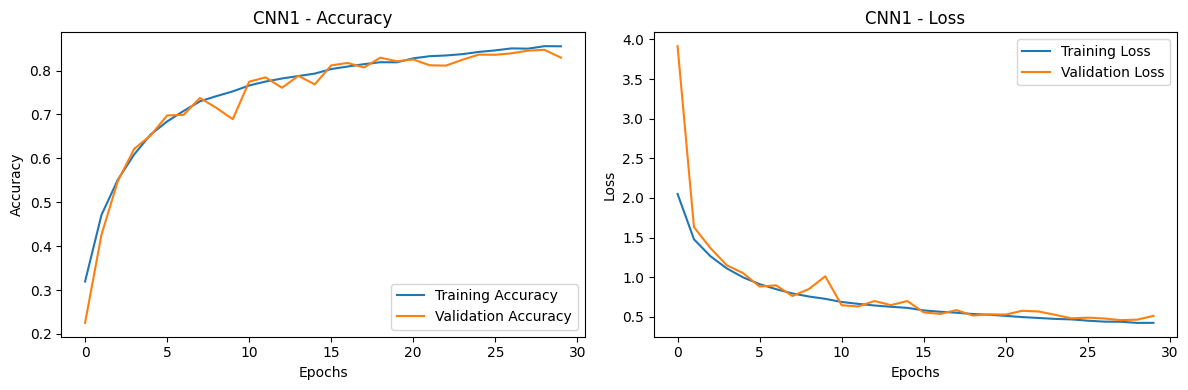

313/313 [==============================] - 1s 3ms/step
CNN1 - Test accuracy: 0.8385, Test loss: 0.4981


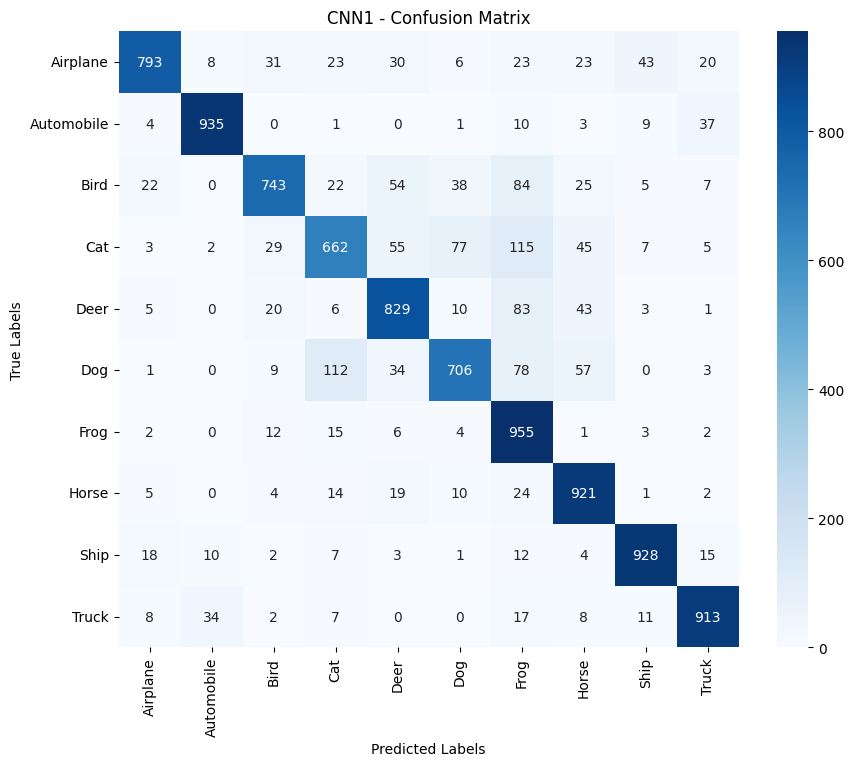


CNN1 - Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.79      0.85      1000
           1       0.95      0.94      0.94      1000
           2       0.87      0.74      0.80      1000
           3       0.76      0.66      0.71      1000
           4       0.80      0.83      0.82      1000
           5       0.83      0.71      0.76      1000
           6       0.68      0.95      0.80      1000
           7       0.82      0.92      0.86      1000
           8       0.92      0.93      0.92      1000
           9       0.91      0.91      0.91      1000

    accuracy                           0.84     10000
   macro avg       0.85      0.84      0.84     10000
weighted avg       0.85      0.84      0.84     10000


Training CNN2 Model...

Epoch 1/30
391/391 [==============================] - 39s 80ms/step - loss: 1.8917 - accuracy: 0.3672 - val_loss: 2.6285 - val_accuracy: 0.1970
Epoch 2/30
391/391 [====================

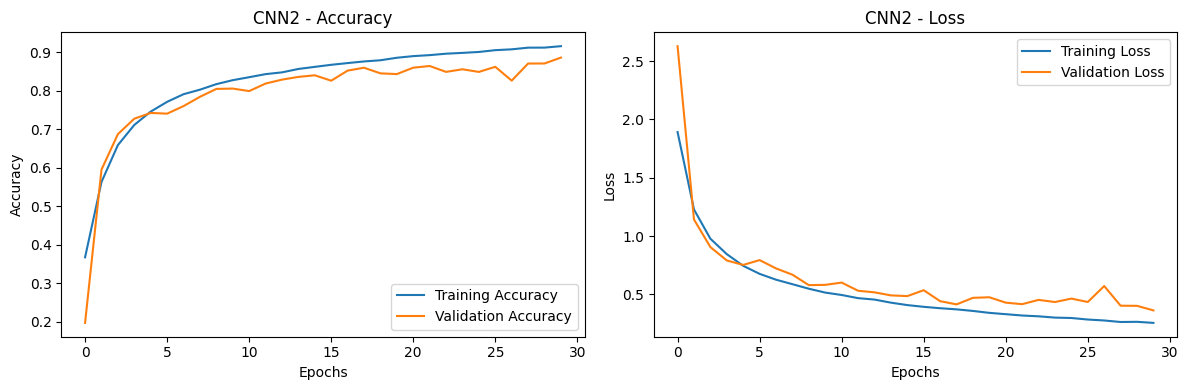

313/313 [==============================] - 1s 2ms/step
CNN2 - Test accuracy: 0.8967, Test loss: 0.3307


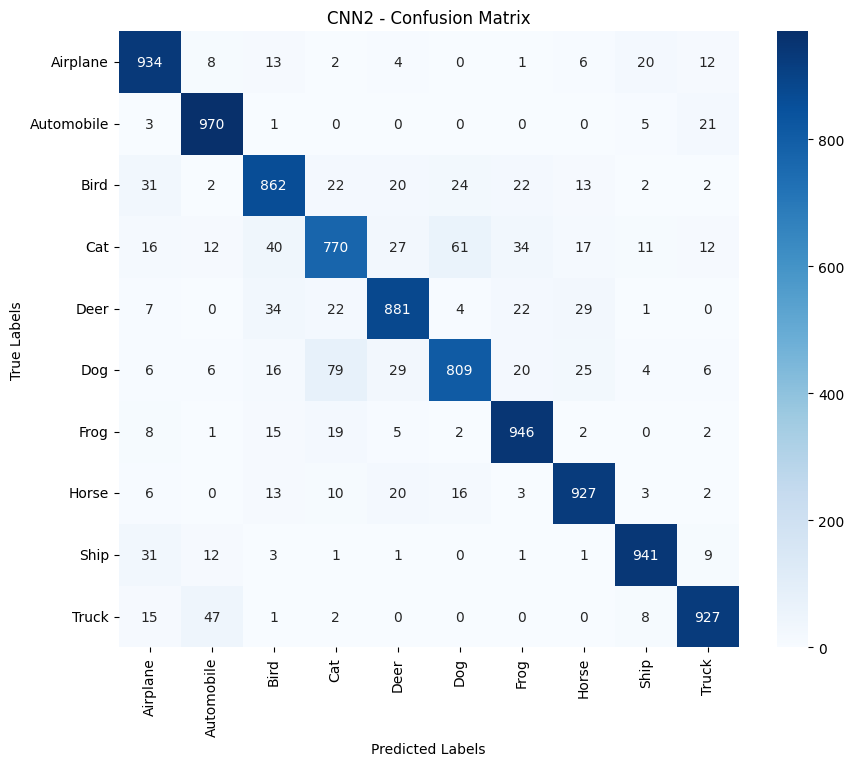


CNN2 - Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.93      0.91      1000
           1       0.92      0.97      0.94      1000
           2       0.86      0.86      0.86      1000
           3       0.83      0.77      0.80      1000
           4       0.89      0.88      0.89      1000
           5       0.88      0.81      0.84      1000
           6       0.90      0.95      0.92      1000
           7       0.91      0.93      0.92      1000
           8       0.95      0.94      0.94      1000
           9       0.93      0.93      0.93      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000


Training CNN3 Model...

Epoch 1/30
391/391 [==============================] - 38s 78ms/step - loss: 2.2646 - accuracy: 0.2667 - val_loss: 2.9305 - val_accuracy: 0.1887
Epoch 2/30
391/391 [====================

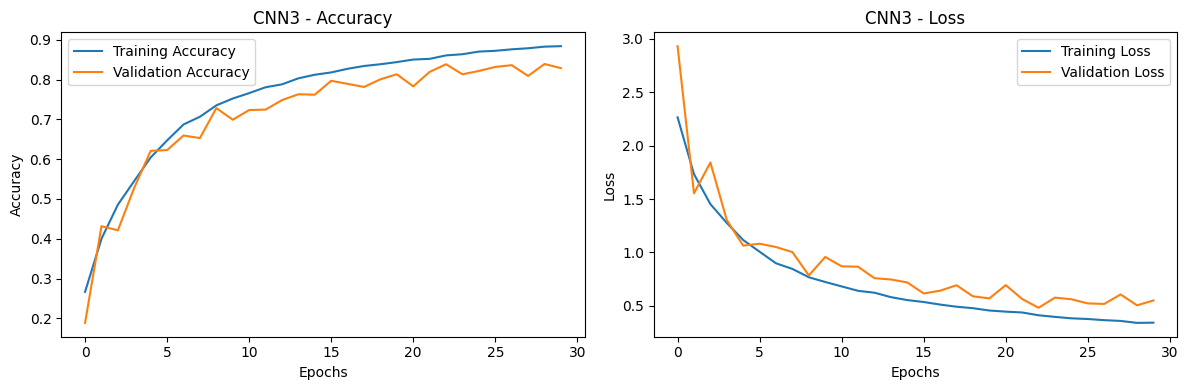

313/313 [==============================] - 1s 3ms/step
CNN3 - Test accuracy: 0.8398, Test loss: 0.5269


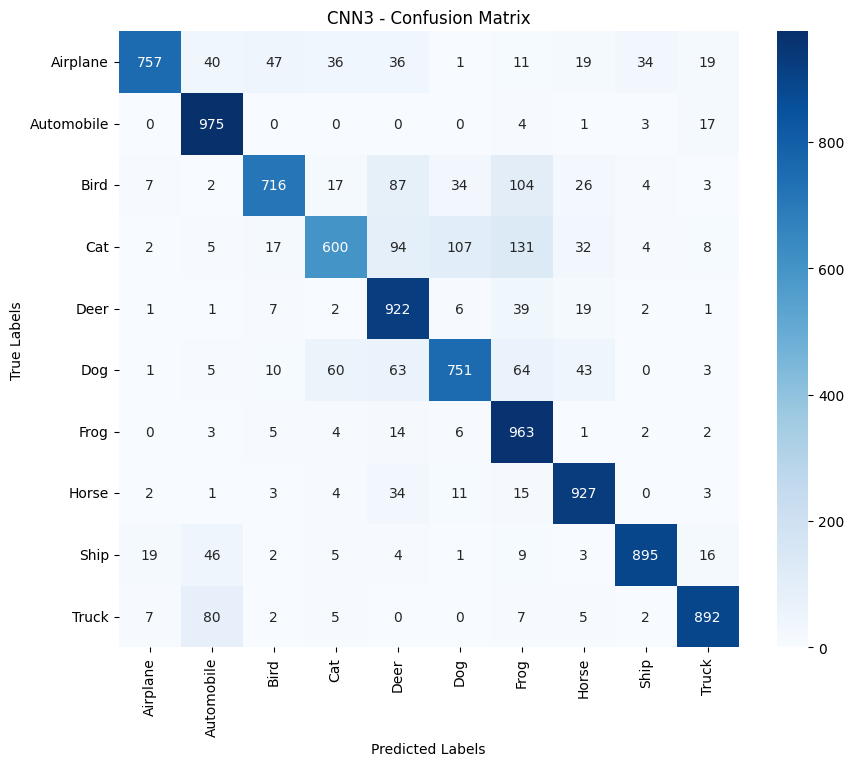


CNN3 - Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.76      0.84      1000
           1       0.84      0.97      0.90      1000
           2       0.89      0.72      0.79      1000
           3       0.82      0.60      0.69      1000
           4       0.74      0.92      0.82      1000
           5       0.82      0.75      0.78      1000
           6       0.71      0.96      0.82      1000
           7       0.86      0.93      0.89      1000
           8       0.95      0.90      0.92      1000
           9       0.93      0.89      0.91      1000

    accuracy                           0.84     10000
   macro avg       0.85      0.84      0.84     10000
weighted avg       0.85      0.84      0.84     10000


Training VGG16 Model...

Epoch 1/30
391/391 [==============================] - 31s 75ms/step - loss: 1.6541 - accuracy: 0.4146 - val_loss: 1.4109 - val_accuracy: 0.5035
Epoch 2/30
391/391 [===================

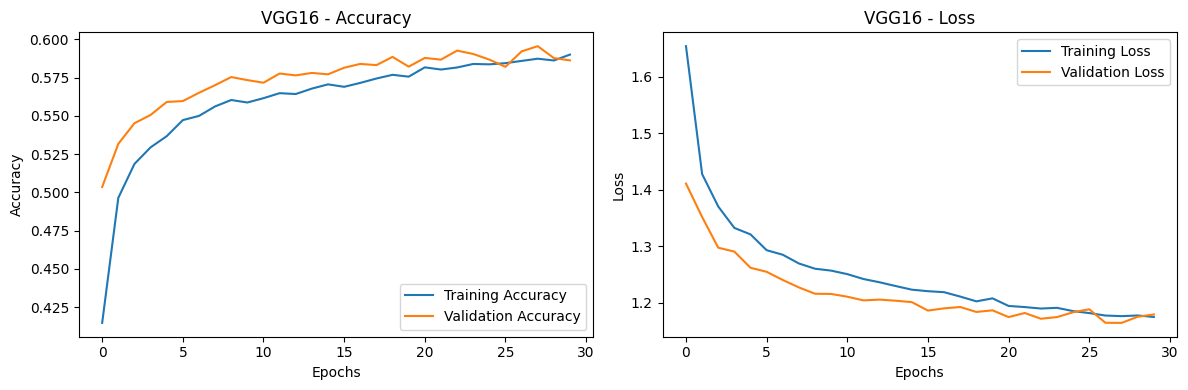

313/313 [==============================] - 1s 3ms/step
VGG16 - Test accuracy: 0.6110, Test loss: 1.1170


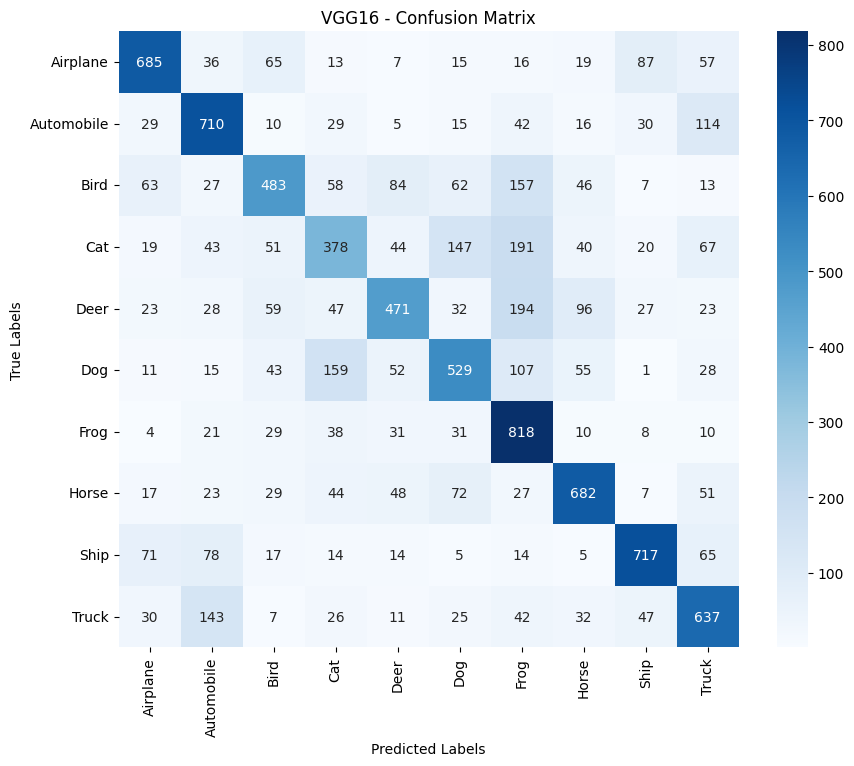


VGG16 - Classification Report:

              precision    recall  f1-score   support

           0       0.72      0.69      0.70      1000
           1       0.63      0.71      0.67      1000
           2       0.61      0.48      0.54      1000
           3       0.47      0.38      0.42      1000
           4       0.61      0.47      0.53      1000
           5       0.57      0.53      0.55      1000
           6       0.51      0.82      0.63      1000
           7       0.68      0.68      0.68      1000
           8       0.75      0.72      0.74      1000
           9       0.60      0.64      0.62      1000

    accuracy                           0.61     10000
   macro avg       0.62      0.61      0.61     10000
weighted avg       0.62      0.61      0.61     10000


Training MobileNet Model...

Epoch 1/30
391/391 [==============================] - 43s 104ms/step - loss: 1.6738 - accuracy: 0.4642 - val_loss: 0.8783 - val_accuracy: 0.7189
Epoch 2/30
391/391 [=============

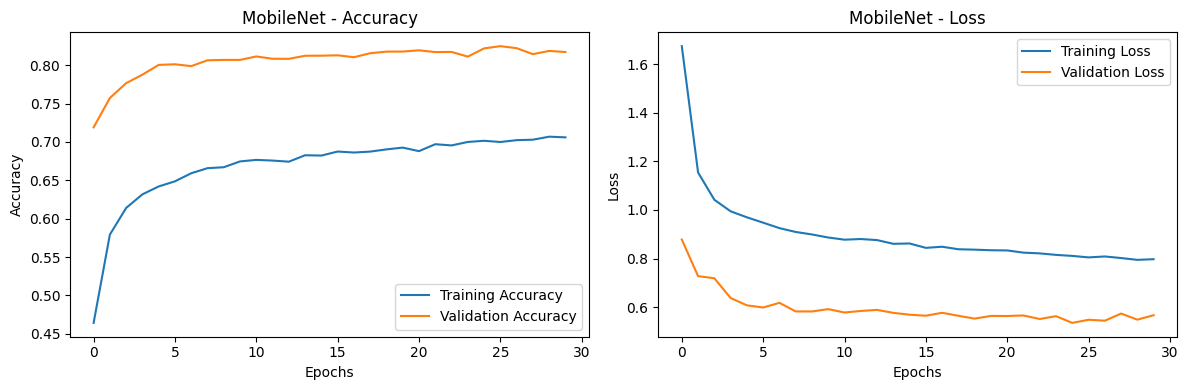

313/313 [==============================] - 6s 17ms/step
MobileNet - Test accuracy: 0.8631, Test loss: 0.4375


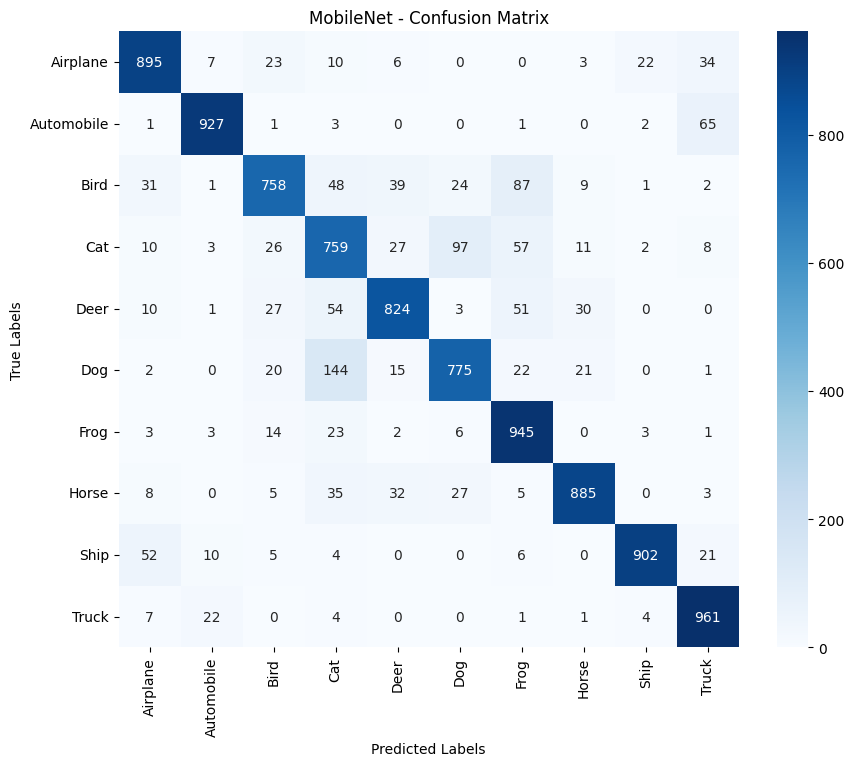


MobileNet - Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.90      0.89      1000
           1       0.95      0.93      0.94      1000
           2       0.86      0.76      0.81      1000
           3       0.70      0.76      0.73      1000
           4       0.87      0.82      0.85      1000
           5       0.83      0.78      0.80      1000
           6       0.80      0.94      0.87      1000
           7       0.92      0.89      0.90      1000
           8       0.96      0.90      0.93      1000
           9       0.88      0.96      0.92      1000

    accuracy                           0.86     10000
   macro avg       0.87      0.86      0.86     10000
weighted avg       0.87      0.86      0.86     10000


Training InceptionV3 Model...

Epoch 1/30
391/391 [==============================] - 92s 223ms/step - loss: 1.4764 - accuracy: 0.4821 - val_loss: 1.2199 - val_accuracy: 0.5722
Epoch 2/30
391/391 [=======

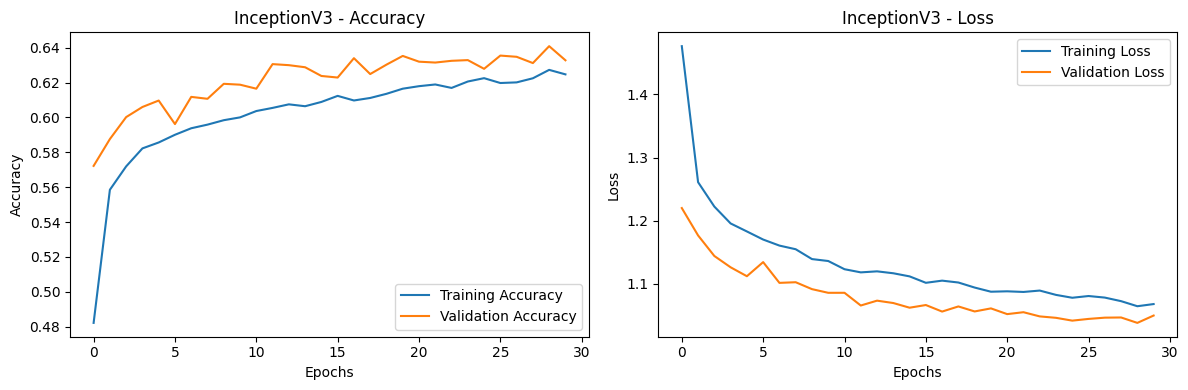

313/313 [==============================] - 4s 8ms/step
InceptionV3 - Test accuracy: 0.6551, Test loss: 0.9984


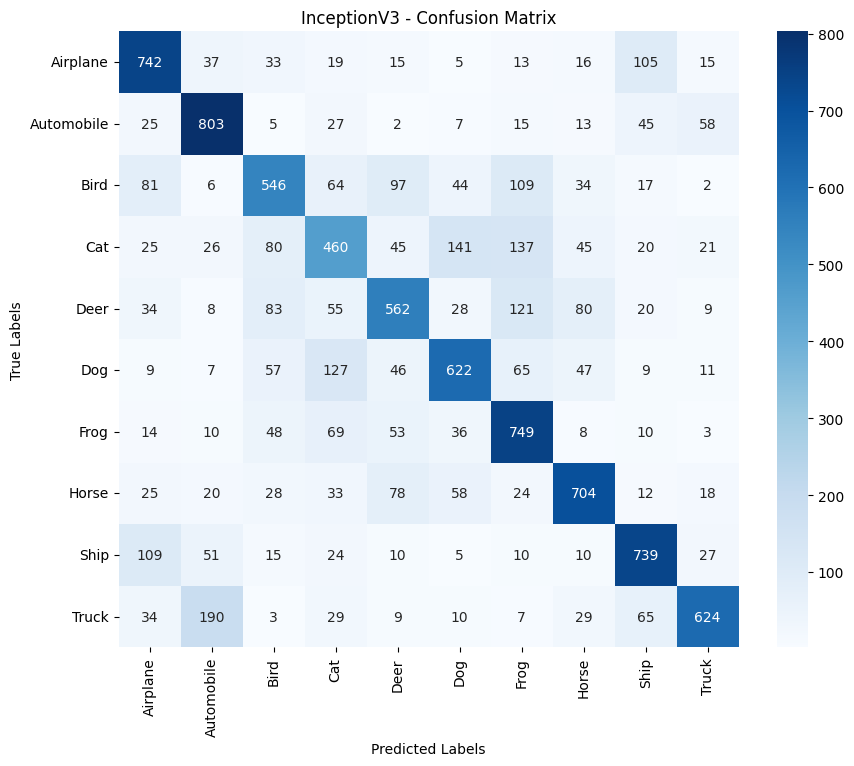


InceptionV3 - Classification Report:

              precision    recall  f1-score   support

           0       0.68      0.74      0.71      1000
           1       0.69      0.80      0.74      1000
           2       0.61      0.55      0.58      1000
           3       0.51      0.46      0.48      1000
           4       0.61      0.56      0.59      1000
           5       0.65      0.62      0.64      1000
           6       0.60      0.75      0.67      1000
           7       0.71      0.70      0.71      1000
           8       0.71      0.74      0.72      1000
           9       0.79      0.62      0.70      1000

    accuracy                           0.66     10000
   macro avg       0.66      0.66      0.65     10000
weighted avg       0.66      0.66      0.65     10000



In [17]:
# Train and evaluate the models
for model, model_name in zip(models, model_names):
    print(f"\nTraining {model_name} Model...\n")

    if model_name == 'InceptionV3':
        # Resize input data for InceptionV3
        x_train_resized = tf.image.resize(x_train, input_shape[:2])
        x_test_resized = tf.image.resize(x_test, input_shape[:2])

        history = model.fit(
            datagen.flow(x_train_resized, y_train, batch_size=128),
            epochs=30,
            validation_data=datagen.flow(x_test_resized, y_test, batch_size=128),
            callbacks=[early_stopping]
        )
    else:
        history = model.fit(
            datagen.flow(x_train, y_train, batch_size=128),
            epochs=30,
            validation_data=datagen.flow(x_test, y_test, batch_size=128),
            callbacks=[early_stopping]
        )
    print(f"\n{model_name} - Model Summary:")
    model.summary()
    print("\n")

    # Plot the model architecture
    plot_model(model, to_file=f"{model_name}_architecture.png", show_shapes=True, show_layer_names=True)

    # Plot accuracy and loss graphs
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title(f'{model_name} - Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title(f'{model_name} - Loss')

    plt.tight_layout()
    plt.show()

    # Evaluate the model
    if model_name == 'InceptionV3':
        test_loss, test_acc = model.evaluate(x_test_resized, y_test)
        y_pred = model.predict(x_test_resized)
    else:
        test_loss, test_acc = model.evaluate(x_test, y_test)
        y_pred = model.predict(x_test)

    print(f"{model_name} - Test accuracy: {test_acc:.4f}, Test loss: {test_loss:.4f}")

    # Generate predictions for the test set
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_test, axis=1)

    # Map the integer labels to class names
    y_pred_class_names = [class_names[i] for i in y_pred_classes]
    y_true_class_names = [class_names[i] for i in y_true_classes]

    # Create a confusion matrix
    cm = confusion_matrix(y_true_classes, y_pred_classes)

    # Create a DataFrame with class names as row and column labels
    cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)

    # Plot the confusion matrix using seaborn
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'{model_name} - Confusion Matrix')
    plt.show()

    # Print classification report
    cr = classification_report(y_true_classes, y_pred_classes)
    print(f"\n{model_name} - Classification Report:\n")
    print(cr)

    # Append accuracy and loss values to the lists
    accuracies.append(test_acc)
    losses.append(test_loss)

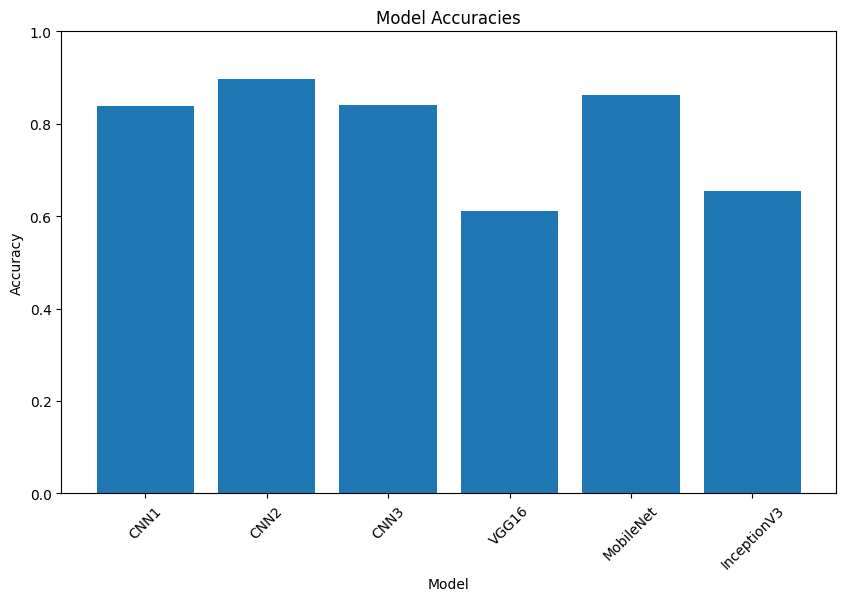

In [18]:
# Compare model accuracies using a bar chart
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracies')
plt.ylim([0, 1])
plt.xticks(rotation=45)
plt.show()

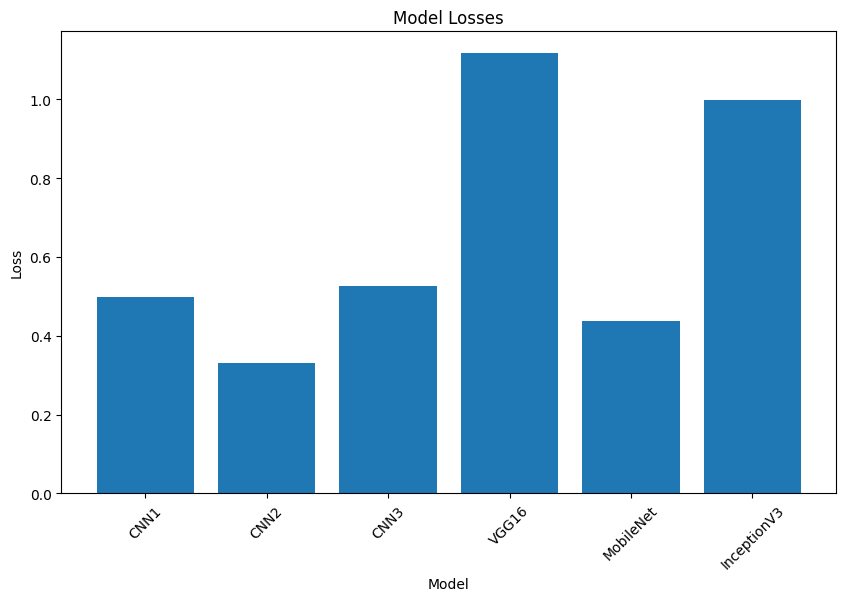

In [19]:
# Compare model losses using a bar chart
plt.figure(figsize=(10, 6))
plt.bar(model_names, losses)
plt.xlabel('Model')
plt.ylabel('Loss')
plt.title('Model Losses')
plt.xticks(rotation=45)
plt.show()